<a href="https://colab.research.google.com/github/destroyedprawn/ECGR-4106-Real-Time-Machine-Learning/blob/main/Homework0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 0

Problem 1

In [1]:
# Imports models from torchvision
from torchvision import models

In [2]:
# Assigns the pretrained resnet 101 model to resnet
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [29]:
# Normalizes an image by resizing, centering, cropping, then converts the image 
# to a tensor.
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [30]:
# Import image
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/horsepics/horse2.jpg")

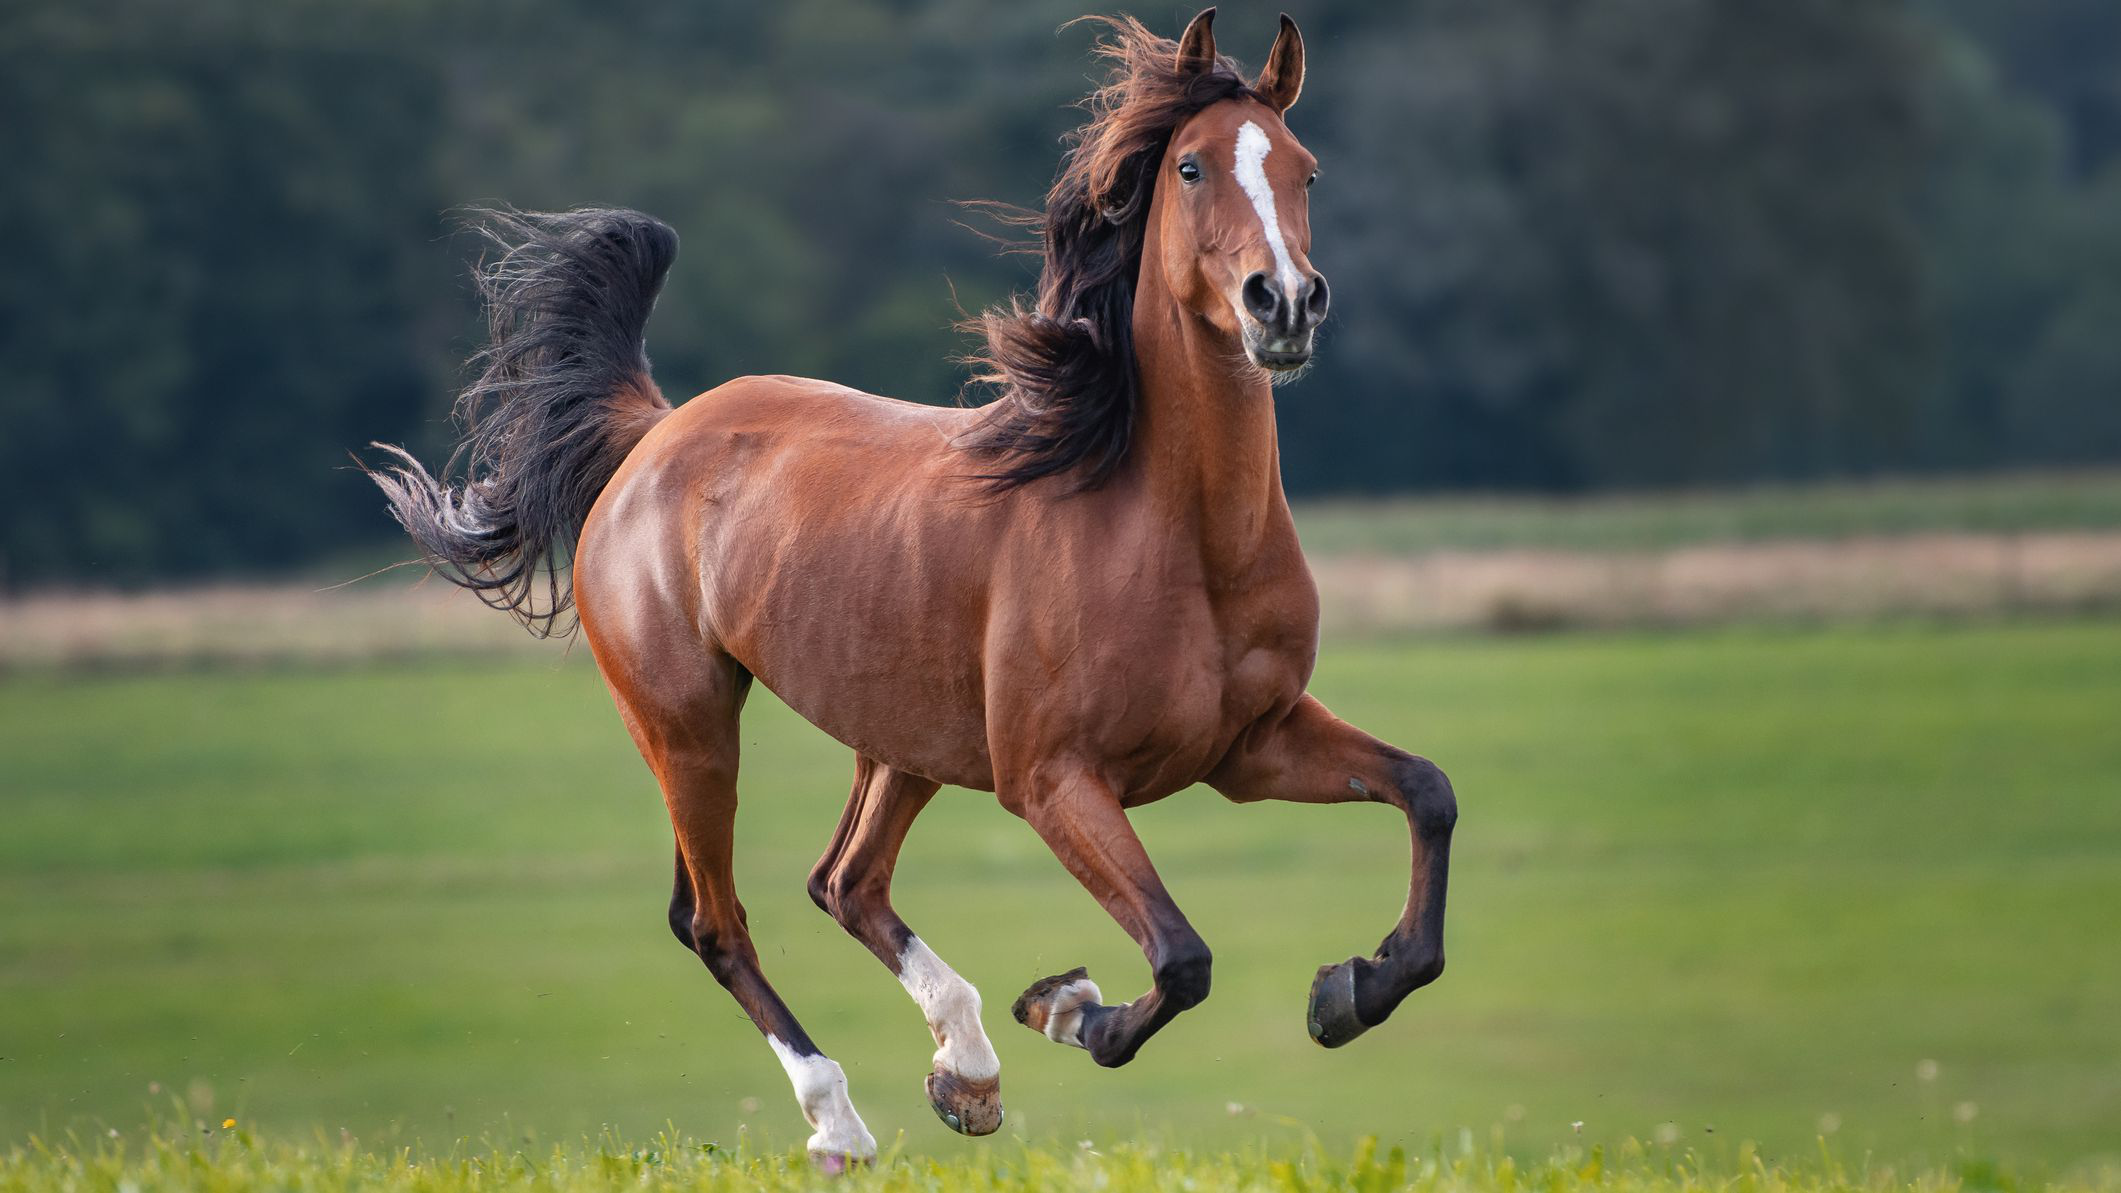

In [31]:
# Prints input image
img

In [32]:
# Normalizes image with the centering and resizing function
img_t = preprocess(img)

In [33]:
# Creates a batch from the normalized 
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [34]:
# Runs resnet in evaluation mode
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
# Outputs the batch
out = resnet(batch_t)
out

tensor([[-1.4358e+00, -3.8470e-01, -2.8972e-01, -1.0177e+00, -5.5812e-02,
         -2.1911e+00, -1.0209e+00,  2.4052e+00,  2.7640e-01,  1.3161e+00,
          1.3311e+00,  4.1505e-01,  5.7398e-01, -1.7490e+00, -8.4176e-01,
          1.5651e+00,  4.6248e-01, -5.2561e-01,  1.0953e+00, -6.9536e-02,
         -2.7112e-01,  2.4476e+00, -1.3147e+00,  2.2743e+00, -1.6704e+00,
         -9.5177e-01,  2.8783e-01, -1.2784e+00, -1.8529e-01, -1.2441e+00,
          7.8317e-01, -3.0301e-01,  4.0945e-01, -1.7689e+00, -1.0258e+00,
         -1.8012e-01,  1.1187e+00, -8.1954e-01,  9.9827e-01,  3.1825e-01,
          3.3404e-02,  1.2093e+00, -1.3590e+00, -3.4438e-02, -3.6845e-01,
         -7.6318e-01, -4.9715e-01,  1.3188e-01, -2.0040e+00,  4.2265e-01,
         -1.0461e+00,  2.1071e-01,  1.7647e-01,  8.3348e-01, -1.1023e+00,
          9.9353e-01, -1.2372e+00,  4.4810e-01,  1.3280e+00,  2.2158e+00,
          3.5720e-02, -3.8100e-01,  1.1983e-01,  1.1280e-01,  4.9580e-01,
         -5.8051e-01, -5.8618e-01, -1.

In [36]:
# Retrieves the 1000 Imagenet classes
with open('/content/drive/MyDrive/Colab Notebooks/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [37]:
# Selects top result
_, index = torch.max(out, 1)

In [38]:
# Normalized percentages and prints with label
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 
labels[index[0]], percentage[index[0]].item()

('sorrel', 75.85191345214844)

In [39]:
# Sorts results and prints the top five with the greatest precentages
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('sorrel', 75.85191345214844),
 ('impala, Aepyceros melampus', 5.996163845062256),
 ('gazelle', 1.0071862936019897),
 ('stopwatch, stop watch', 1.0071262121200562),
 ('hartebeest', 0.8918223977088928)]

Problem 2 (Cyclegen Horse2Zebra Deepfake)

In [ ]:
# From "Deep Learning with PyTorch" book and GitHub
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [ ]:
# Makes netG from the ResNetGenerator
netG = ResNetGenerator()

In [ ]:
# Imports and loads netG with the pretrained horse2zebra model
model_path = '/content/drive/MyDrive/Colab Notebooks/TestImages/horsepics/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [ ]:
# Runs netG in evaluation mode
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [ ]:
from PIL import Image

#Imports transforms for normalizing
from torchvision import transforms

In [ ]:
# Resizes image and converts to tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

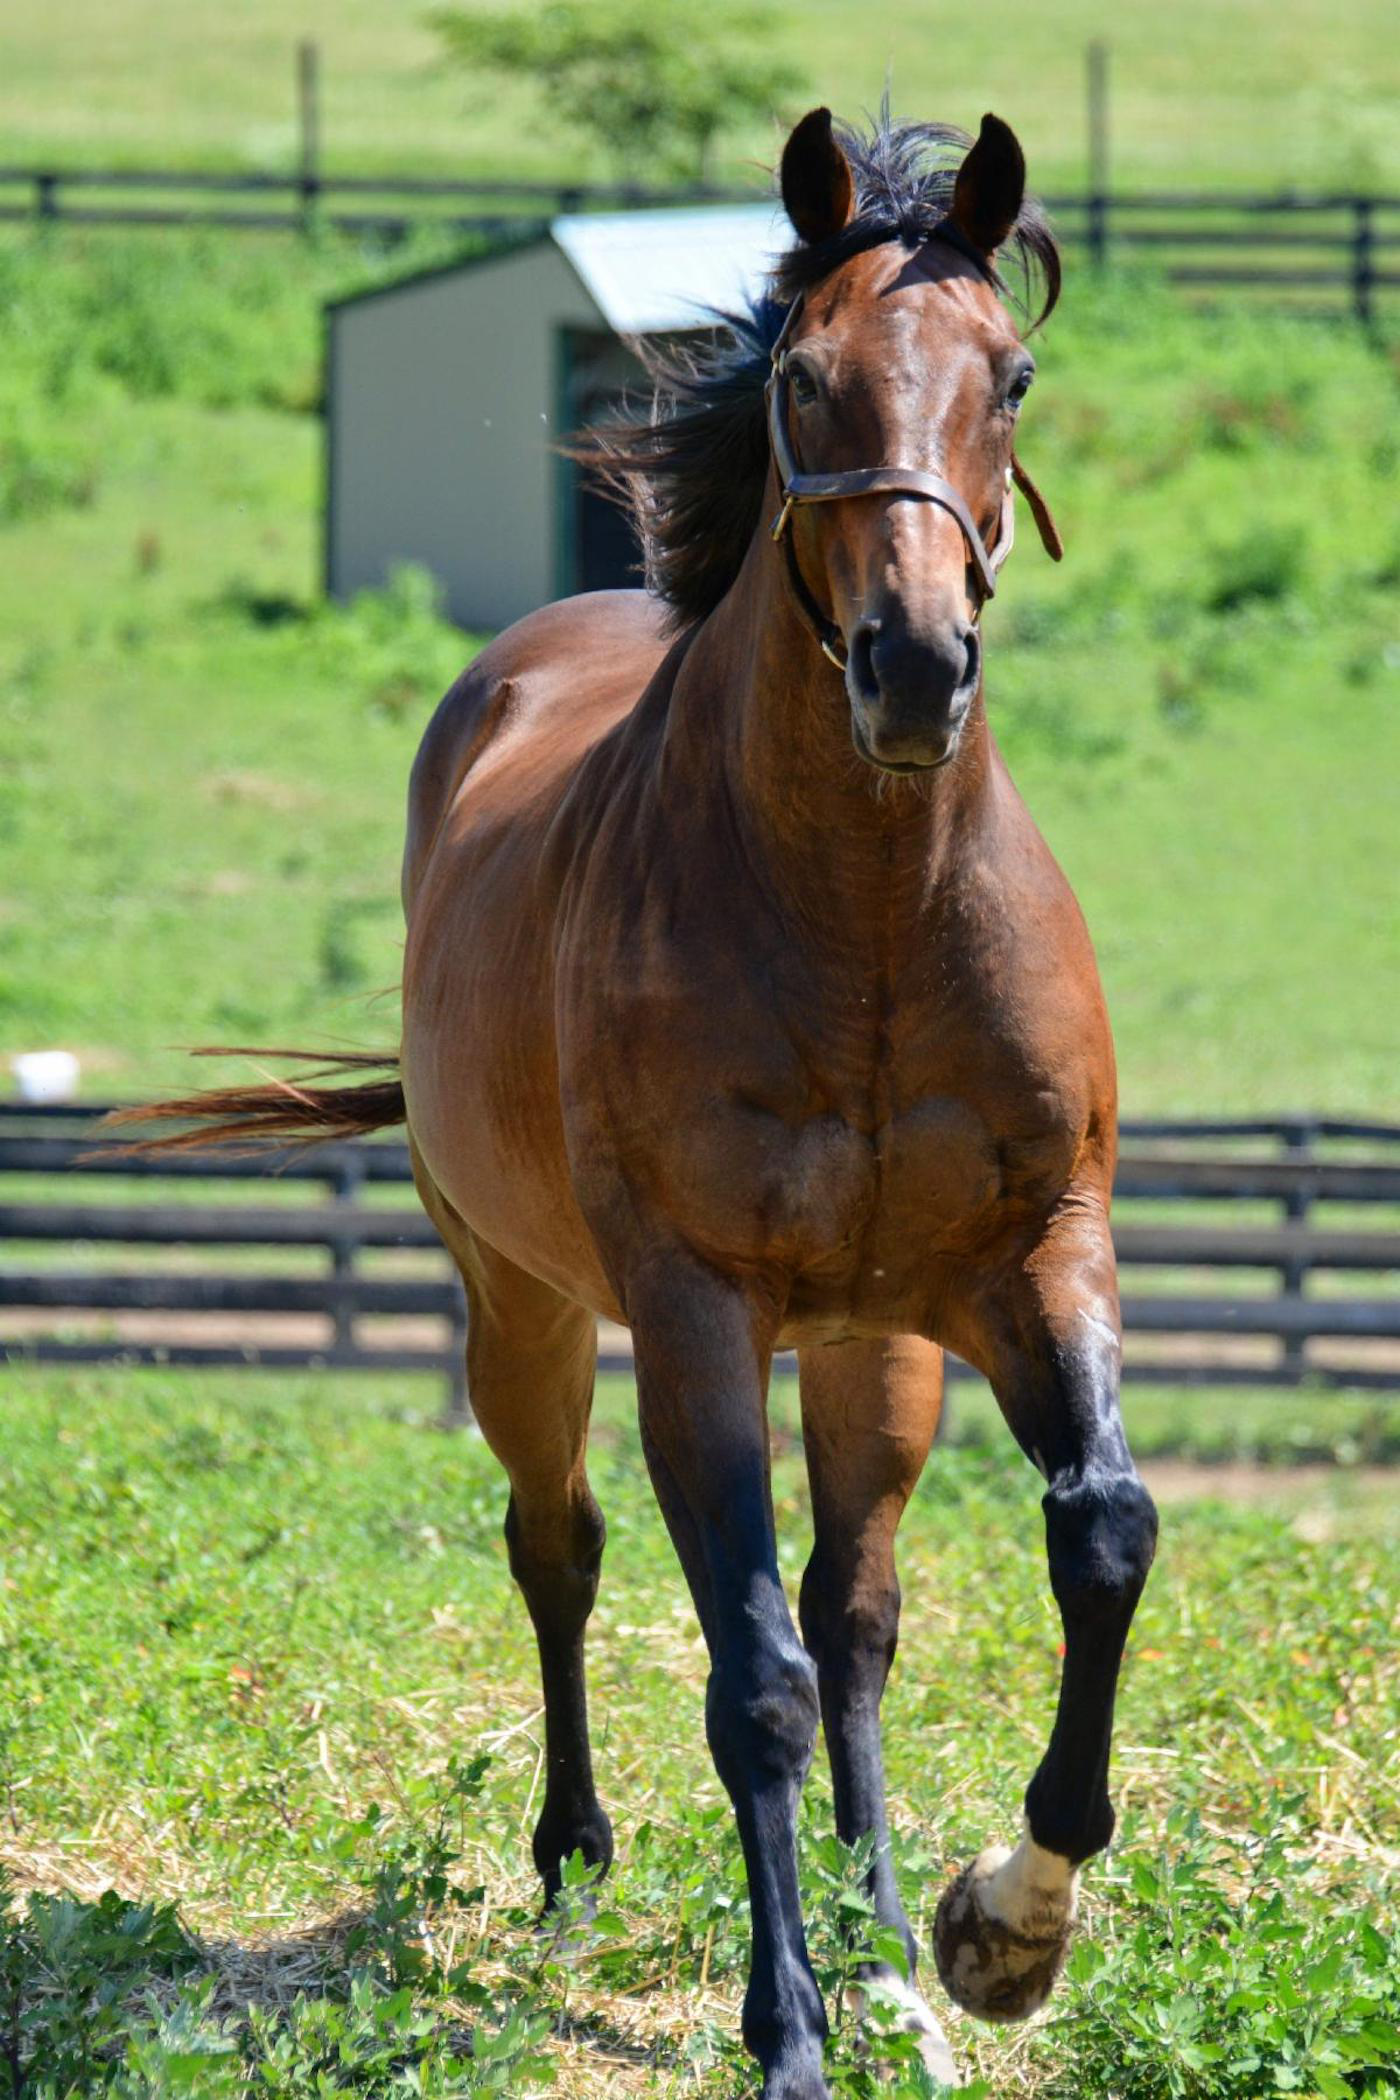

In [ ]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/TestImages/horsepics/horse5.jpg")
img

In [ ]:
# Applies preprocess function to input image 
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
# Creates output batch
batch_out = netG(batch_t)

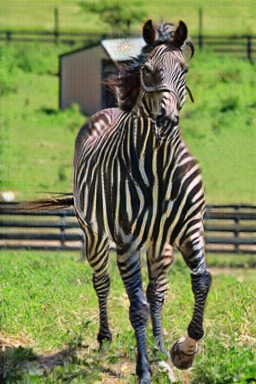

In [ ]:
# Prints output image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('../data/p1ch2/zebra.jpg')
out_img

Problem 3

In [ ]:
# Installs ptflops library
pip install ptflops

In [ ]:
# Gets the model complexity info from the netG model
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = netG
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNetGenerator(
  11.378 M, 100.000% Params, 43.555 GMac, 100.000% MACs, 
  (model): Sequential(
    11.378 M, 100.000% Params, 43.555 GMac, 100.000% MACs, 
    (0): ReflectionPad2d(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, (3, 3, 3, 3))
    (1): Conv2d(0.009 M, 0.083% Params, 0.475 GMac, 1.091% MACs, 3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(0.0 M, 0.000% Params, 0.003 GMac, 0.007% MACs, 64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.007% MACs, inplace=True)
    (4): Conv2d(0.074 M, 0.649% Params, 0.926 GMac, 2.127% MACs, 64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(0.0 M, 0.000% Params, 0.002 GMac, 0.004% MACs, 128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(0.0 M, 0.000% Params, 0.002 GMac, 0.004% MACs, inplace=True)
    (7): Conv2d(0.295 M, 2.594% Params, 0.926 GMac, 2.125% MACs, 128, 256, kernel_size=(3, 3)

In [ ]:
# Gets the model complexity info from the resnet model
with torch.cuda.device(0):
  net = resnet
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

NameError: ignored

Problem 4

In [ ]:
import torch
# Loads the pretrained MobileNet V2
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

# Runs MobileNet V2 in evaluation mode
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
# Download an example image
import urllib
url, filename = ("https://images.theconversation.com/files/44391/original/b3nk2h27-1395313678.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip", "jet.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# Imports and normalizes image, creating a tensor and batch for the model
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])

# The output has unnormalized scores. To get probabilities, run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.4820e+00,  1.9474e-01, -2.0575e+00, -3.1448e+00,  1.3765e+00,
         8.9189e-01,  1.1197e+00,  7.8684e+00,  5.6146e+00,  7.5817e+00,
        -1.7569e+00, -1.6201e+00,  9.0187e-01,  1.2202e+00, -2.9199e+00,
        -1.7872e+00,  2.1613e+00,  2.2111e+00,  2.6174e+00,  3.6967e+00,
        -1.3015e-02,  3.5011e+00,  3.8186e+00,  4.9886e+00,  2.6449e+00,
        -1.1983e+00, -1.9623e+00, -4.1297e-01,  2.9676e-01, -3.0216e+00,
        -1.4556e+00, -2.6948e+00, -2.8735e+00,  6.7805e-02,  6.1364e-01,
        -1.4612e+00,  2.0511e+00, -1.2511e+00, -2.8005e+00, -2.8802e-01,
        -1.3741e+00, -3.7716e+00, -2.1091e-01,  7.7569e-01, -2.4509e-01,
        -1.0173e+00, -6.7792e-01, -2.0730e-01, -5.7995e-01, -2.5732e+00,
        -4.6337e-02,  2.2080e+00, -1.8581e-01, -1.4635e+00, -1.0622e+00,
         1.6266e-01, -2.7935e+00, -6.8117e-01, -1.6785e-01,  6.6266e-01,
         1.1614e+00, -4.2583e-01,  6.7631e-01,  3.4142e+00,  8.6509e-01,
         1.3207e+00,  1.0541e+00, -4.8035e-01,  5.0

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-01-27 01:41:13--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-01-27 01:41:13 (80.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item() * 100)

paintbrush 87.54479885101318
otter 1.977190189063549
beaver 1.3160479255020618
hammer 1.0660557076334953
nail 0.8183334022760391


In [ ]:
#Pflops information for MobileNet v2
with torch.cuda.device(0):
  net = model
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

MobileNetV2(
  3.505 M, 100.000% Params, 0.32 GMac, 100.000% MACs, 
  (features): Sequential(
    2.224 M, 63.451% Params, 0.319 GMac, 99.600% MACs, 
    (0): ConvBNActivation(
      0.001 M, 0.026% Params, 0.012 GMac, 3.760% MACs, 
      (0): Conv2d(0.001 M, 0.025% Params, 0.011 GMac, 3.384% MACs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(0.0 M, 0.002% Params, 0.001 GMac, 0.251% MACs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(0.0 M, 0.000% Params, 0.0 GMac, 0.125% MACs, inplace=True)
    )
    (1): InvertedResidual(
      0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
      (conv): Sequential(
        0.001 M, 0.026% Params, 0.012 GMac, 3.635% MACs, 
        (0): ConvBNActivation(
          0.0 M, 0.010% Params, 0.005 GMac, 1.504% MACs, 
          (0): Conv2d(0.0 M, 0.008% Params, 0.004 GMac, 1.128% MACs, 32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
   